## Compare experiments for different media
This notebook is used to compare different experiments using the same analysis pipeline.

It allows for the comparison of different growth media (LB, M9, Trypton) for a fixed optical density 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from config import Config
from data_comparison import DataComparison
from constants import PLOT_SPEED_DISTRIBUTION, PLOT_CHANGE_DIRECTION_BETWEEN_RUN

In [3]:
config = Config(
    **{
        "threshold_nspots": 5,
        "labeling_method": "combined",
        "threshold_angle": 40,  # degrees
        "threshold_speed": 1.5,  # units consistent with POSITION_X/Y and FRAME
        "min_size_cluster": 3,
        "combination_rule": "or",
        "preprocess_to_apply_default" : ["filter_nspots", "interpolate_missing_frames", "add_distance_to_next_point", "sort_by_track_and_frame", "compute_speed"]
    }
)
all_list_experiment = ["Trypton_0P1", "Trypton_0P19","Trypton_0P4",  "M9_500_0P08", "M9_100_0P28", "M9_100_0P5", "M9_100_1P2", "LB_100_0P8", "LB_500_0P2", "LB_500_0P4"]
list_experiment_same_od = ["LB_500_0P2", "Trypton_0P19", "M9_100_0P28"]

dc = DataComparison(list_experiment_same_od, config, pre_path="data")

In [4]:
results_df, results_metrics = dc.process_all()

⚙️ Processing experiment at data/LB_500_0P2_1
Filtering tracks with nspots < 5
 Starting spot_df size: 13244
 Filtered spot_df size: 12093
Interpolating missing frames
Interpolated 325 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
=== Experiment statistics ===
Number of tracks: 298.0
Number of tracks with more than 100 spots: 20.0
Number of spots: 12418.0
Mean speed: 9.84 µm/s
Filtering tracks with nspots < 5
 Starting spot_df size: 12418
 Filtered spot_df size: 12418
Interpolating missing frames
Interpolated 0 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
⚙️ Processing experiment at data/LB_500_0P2_2
Filtering tracks with nspots < 5
 Starting spot_df size: 41439
 Filtered spot_df size: 39603
Interpolating missing frames
Interpolated 912 missing frames across all tracks.
Adding distance to next point
Computing speed
Sorting by TRACK_ID and FRAME
=== Experiment

In [5]:
results_metrics

,n_tracks,n_spots,n_tracks_with_more_than_100_spots,n_runs,mean_speed,mean_speed_tumble,mean_speed_run,experiment_name,experiment_path,medium,OD
0,298.0,12418.0,20.0,103.0,9.843379,5.505257,18.270849,LB_500_0P2,data/LB_500_0P2_1,LB,0.20
1,684.0,40515.0,77.0,494.0,8.899218,6.478880,15.433315,LB_500_0P2,data/LB_500_0P2_2,LB,0.20
2,368.0,23521.0,40.0,204.0,5.675695,4.122668,15.310646,LB_500_0P2,data/LB_500_0P2_3,LB,0.20
3,435.0,24289.0,47.0,99.0,7.289786,5.557453,19.898498,Trypton_0P19,data/Trypton_0P19_1,Trypton,0.19
4,585.0,29239.0,65.0,191.0,10.123872,6.929525,20.656674,Trypton_0P19,data/Trypton_0P19_2,Trypton,0.19
5,1621.0,37198.0,32.0,165.0,18.467241,11.742050,27.342179,M9_100_0P28,data/M9_100_0P28_1,M9,0.28
6,602.0,17544.0,29.0,231.0,19.765688,13.225385,28.612682,M9_100_0P28,data/M9_100_0P28_2,M9,0.28
7,989.0,28186.0,23.0,135.0,19.969257,12.823794,29.254045,M9_100_0P28,data/M9_100_0P28_3,M9,0.28


In [6]:
results_metrics.groupby("medium").mean_speed_run.mean(), results_metrics.groupby("medium").mean_speed_run.std()

(medium
 LB         16.338270
 M9         28.402968
 Trypton    20.277586
 Name: mean_speed_run, dtype: float64,
 medium
 LB         1.674786
 M9         0.973033
 Trypton    0.536111
 Name: mean_speed_run, dtype: float64)

Plotting Speed distribution for experiment: LB with 3 runs
Plotting Speed distribution for experiment: Trypton with 2 runs
Plotting Speed distribution for experiment: M9 with 3 runs


Text(0.5, 1.0, 'Speed Distribution for Runs across Media with fixed OD=0.2')

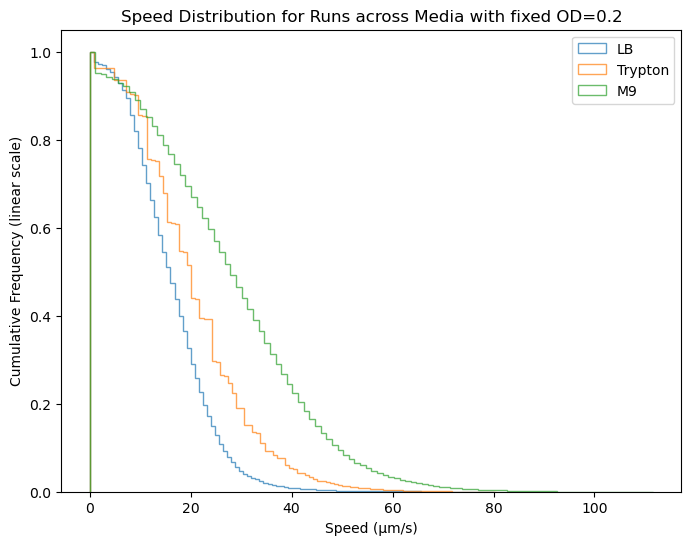

In [7]:
import matplotlib.pyplot as plt
dc.plot(PLOT_SPEED_DISTRIBUTION, aggregate_media=True, log=False, select="run", show_plot=False)
plt.title("Speed Distribution for Runs across Media with fixed OD=0.2")

# Export plot
# plt.savefig("images/speed_distribution_runs.png", dpi=300)

Plotting Speed distribution for experiment: LB with 3 runs
Plotting Speed distribution for experiment: Trypton with 2 runs
Plotting Speed distribution for experiment: M9 with 3 runs


Text(0.5, 1.0, 'Speed Distribution (Run+Tumble) across Media with fixed OD=0.2')

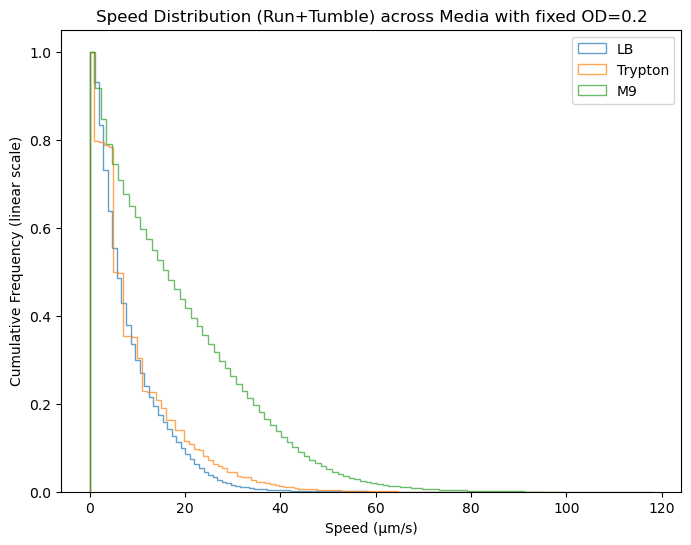

In [8]:
import matplotlib.pyplot as plt
dc.plot(PLOT_SPEED_DISTRIBUTION, aggregate_media=True, show_plot=False)
plt.title("Speed Distribution (Run+Tumble) across Media with fixed OD=0.2")

# Export plot
# plt.savefig("images/speed_distribution_all.png", dpi=300)

Plotting Change direction between runs for experiment: LB_500_0P2 with 3 runs
Plotting Change direction between runs for experiment: Trypton_0P19 with 2 runs
Plotting Change direction between runs for experiment: M9_100_0P28 with 3 runs


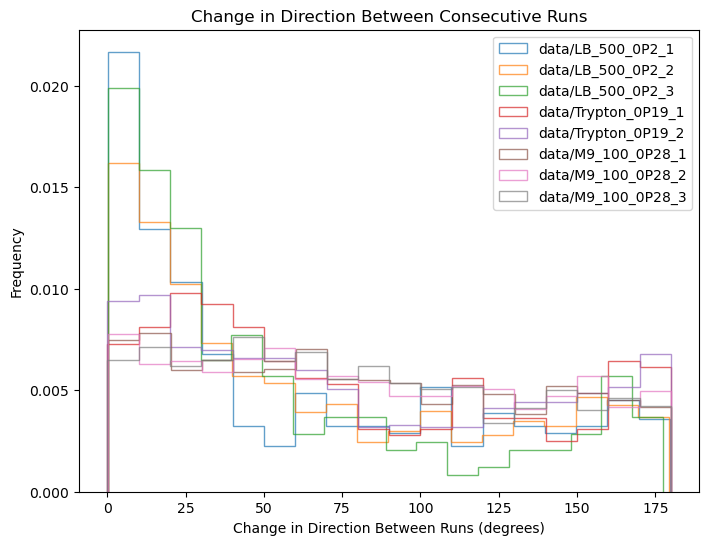

In [9]:
dc.plot(PLOT_CHANGE_DIRECTION_BETWEEN_RUN, filter_run_longer=2, aggregate_runs=False)

# WARNING : aggregate_runs has probably a bug here
# Reason : spot_df is aggregated but track_id are not updated accordingly

Plotting Distribution of run/tumble duration for experiment: LB with 3 runs
Plotting Distribution of run/tumble duration for experiment: Trypton with 2 runs
Plotting Distribution of run/tumble duration for experiment: M9 with 3 runs


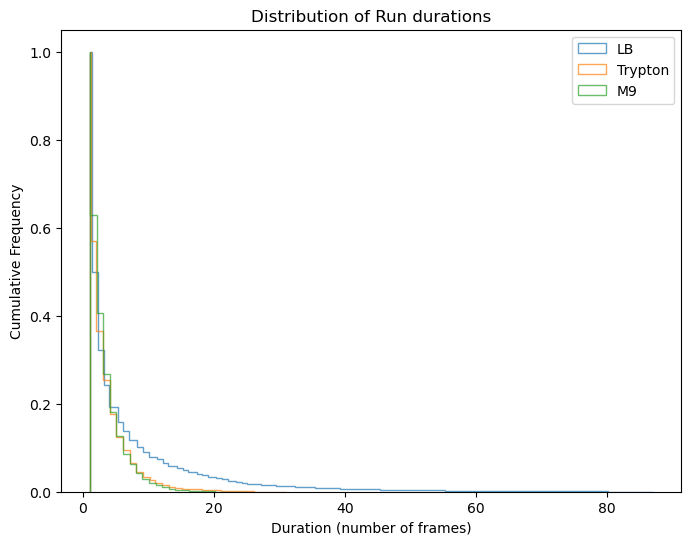

Plotting Distribution of run/tumble duration for experiment: LB with 3 runs
Plotting Distribution of run/tumble duration for experiment: Trypton with 2 runs
Plotting Distribution of run/tumble duration for experiment: M9 with 3 runs


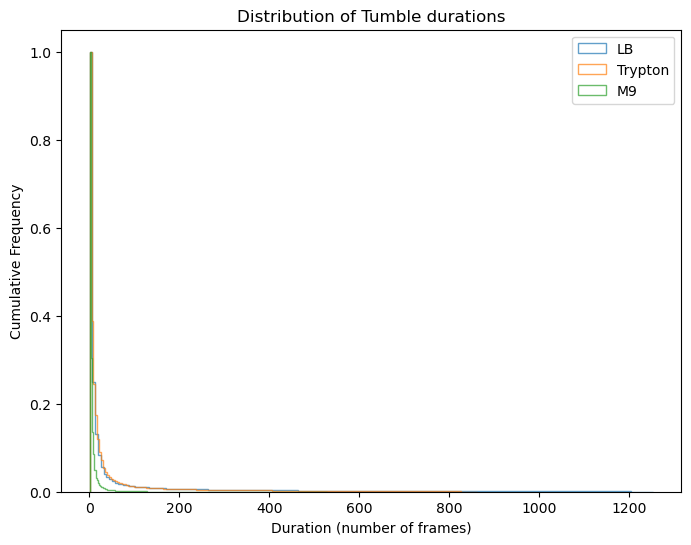

In [10]:
from constants import PLOT_DISTRIBUTION_DURATION
# Note that OD is fixed to ~0.2 in all media here
dc.plot(PLOT_DISTRIBUTION_DURATION, group="run", density=True, aggregate_media=True)
dc.plot(PLOT_DISTRIBUTION_DURATION, group="tumble", density=True, aggregate_media=True)